In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

In [59]:
data = pd.read_csv('Mall_Customers.csv')

In [60]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [61]:
data.shape

(200, 5)

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [63]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [64]:
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [65]:
data.duplicated().sum()

0

In [66]:
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [67]:
data.drop(columns="CustomerID", inplace=True)

In [68]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [69]:
data.shape

(200, 4)

<Axes: xlabel='Gender', ylabel='count'>

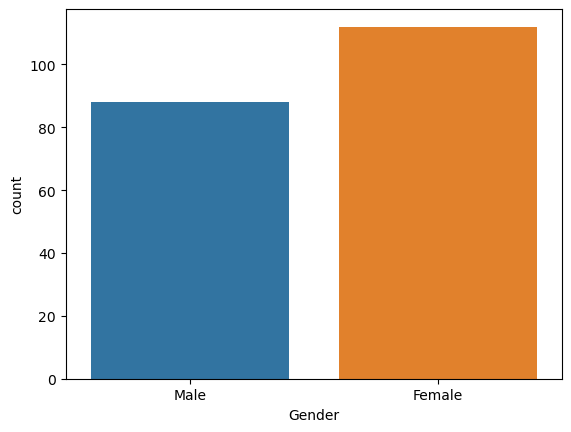

In [70]:
sns.countplot(data=data, x="Gender")

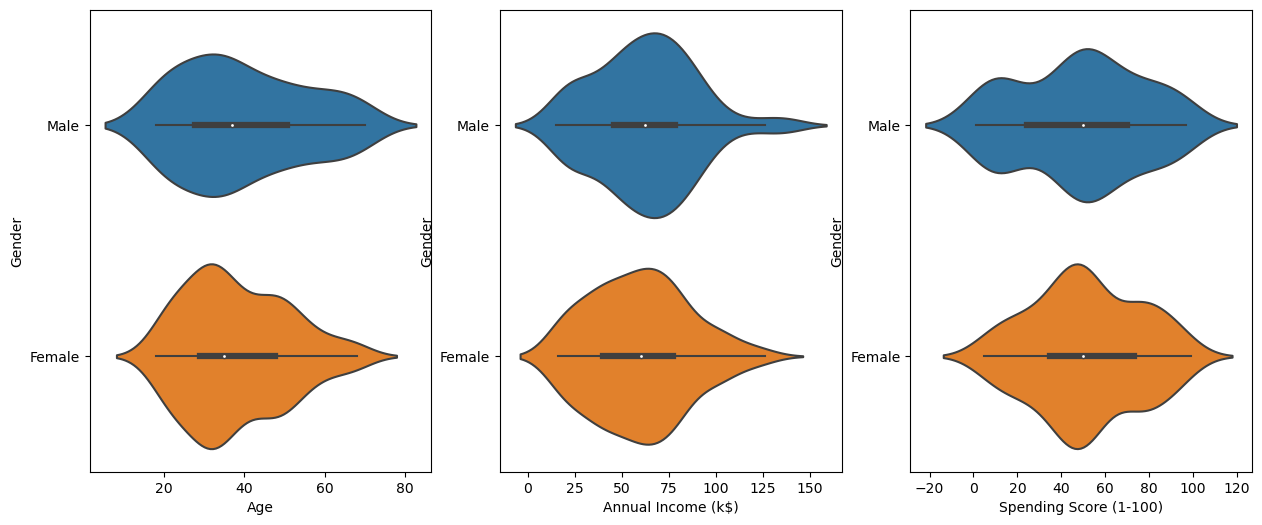

In [71]:
cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

plt.figure(figsize=(15,6))

for i,j in enumerate(cols,1):
    plt.subplot(1,3,i)
    sns.violinplot(data=data, x=j, y="Gender")
    plt.subplots_adjust(hspace=0.5)
plt.show()

In [72]:
data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


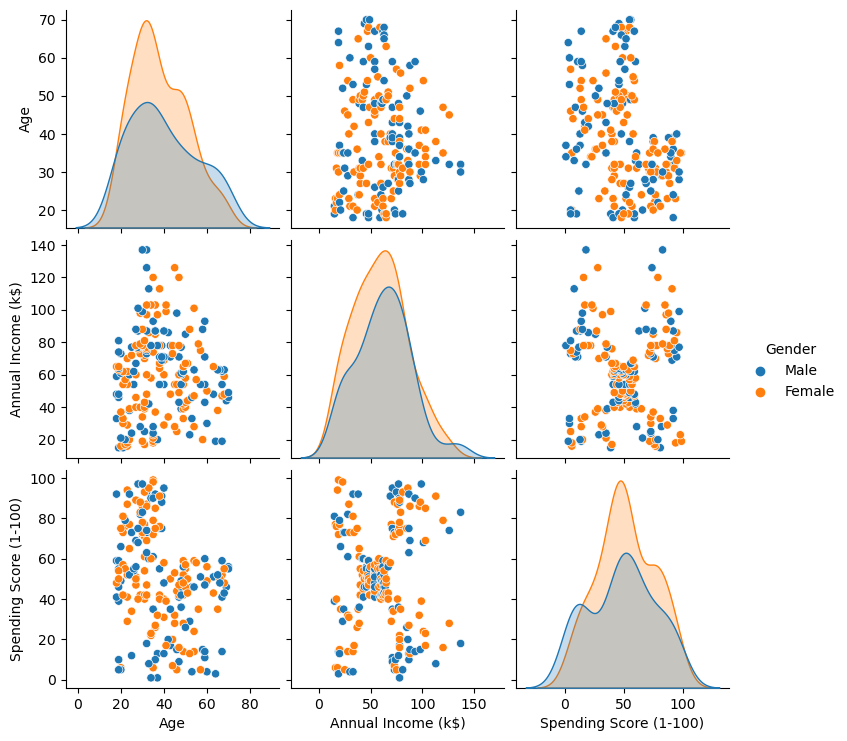

In [73]:
sns.pairplot(data=data, hue="Gender")

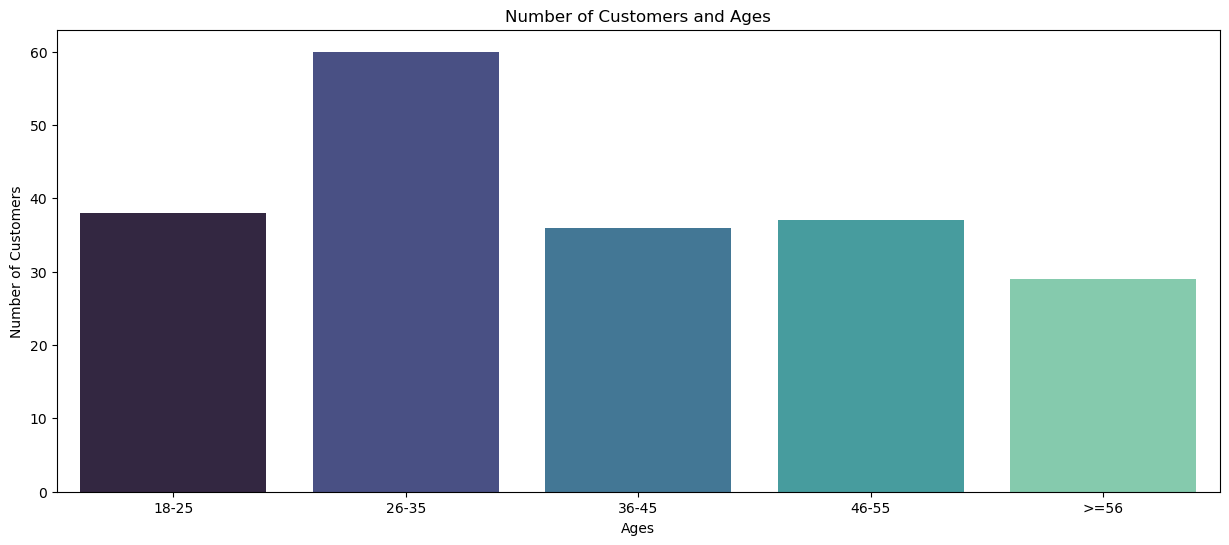

In [74]:
age_18_25 = data[(data["Age"]>= 18)&(data["Age"]<=25)]
age_26_35 = data[(data["Age"]>= 26)&(data["Age"]<=35)]
age_36_45 = data[(data["Age"]>= 36)&(data["Age"]<=45)]
age_46_55 = data[(data["Age"]>= 46)&(data["Age"]<=55)]
age_over_56 = data[(data["Age"]>= 56)]

agex = ["18-25","26-35","36-45","46-55",">=56"]
agey = [len(age_18_25), len(age_26_35), len(age_36_45), len(age_46_55), len(age_over_56)]

plt.figure(figsize=(15,6))
sns.barplot(x=agex, y=agey, palette = "mako")
plt.title("Number of Customers and Ages")
plt.xlabel("Ages")
plt.ylabel("Number of Customers")
plt.show()

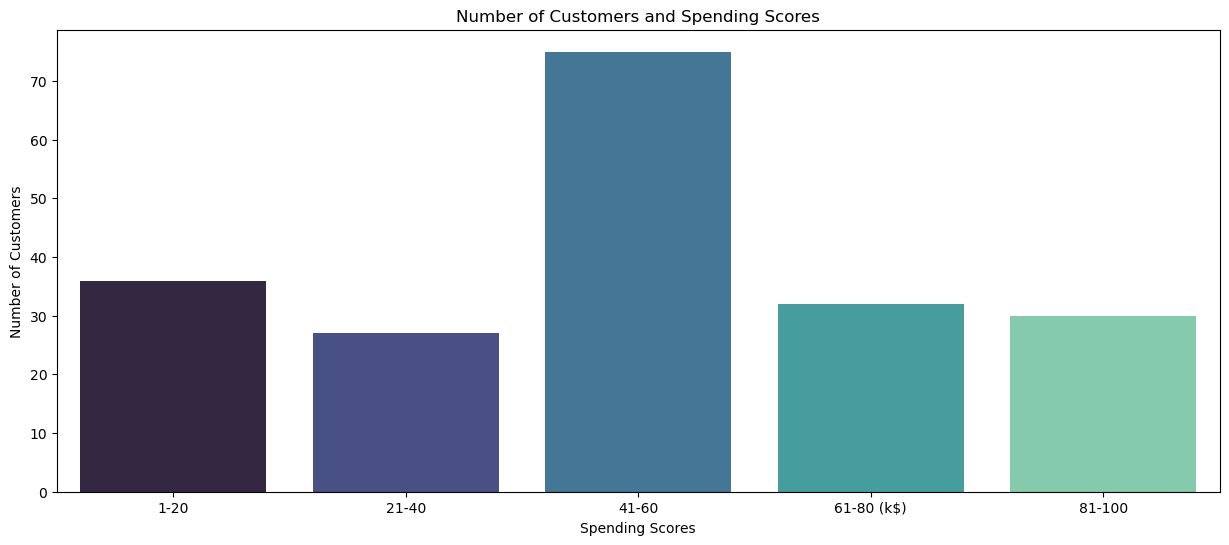

In [75]:
ss_1_20 = data[(data["Spending Score (1-100)"]>=1)&(data["Spending Score (1-100)"]<=20)]
ss_21_40 = data[(data["Spending Score (1-100)"]>=21)&(data["Spending Score (1-100)"]<=40)]
ss_41_60 = data[(data["Spending Score (1-100)"]>=41)&(data["Spending Score (1-100)"]<=60)]
ss_61_80 = data[(data["Spending Score (1-100)"]>=61)&(data["Spending Score (1-100)"]<=80)]
ss_81_100 = data[(data["Spending Score (1-100)"]>=81)&(data["Spending Score (1-100)"]<=100)]

ssx = ["1-20","21-40","41-60","61-80 (k$)","81-100"]
ssy = [len(ss_1_20), len(ss_21_40), len(ss_41_60), len(ss_61_80), len(ss_81_100)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette = "mako")
plt.title("Number of Customers and Spending Scores")
plt.xlabel("Spending Scores")
plt.ylabel("Number of Customers")
plt.show()

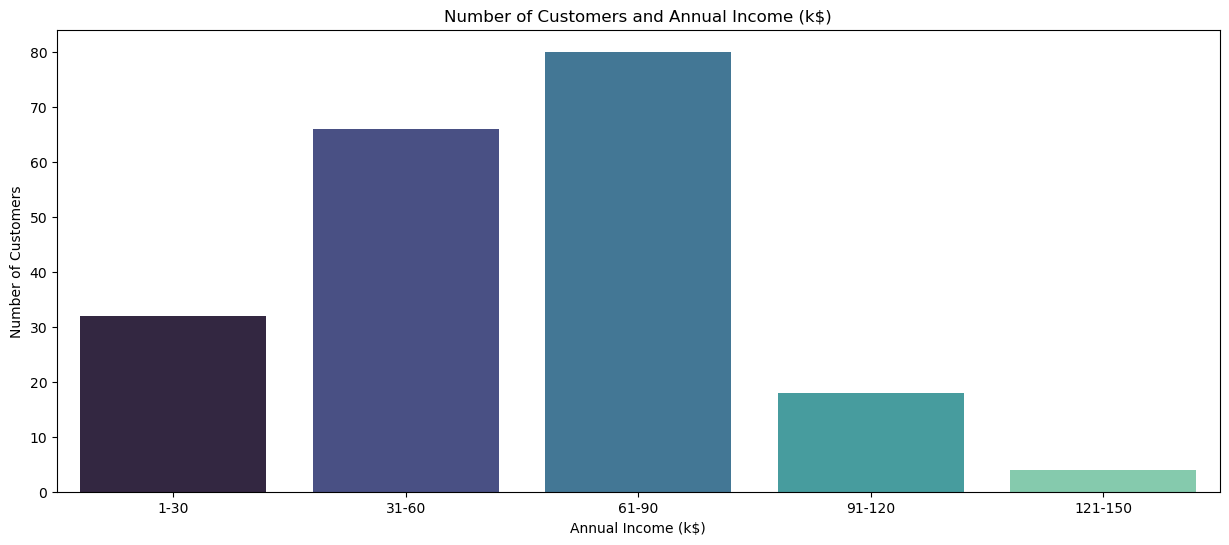

In [19]:
ai30 = data[(data["Annual Income (k$)"]>=1)&(data["Annual Income (k$)"]<=30)]
ai31_60 = data[(data["Annual Income (k$)"]>=31)&(data["Annual Income (k$)"]<=60)]
ai61_90 = data[(data["Annual Income (k$)"]>=61)&(data["Annual Income (k$)"]<=90)]
ai91_120 = data[(data["Annual Income (k$)"]>=91)&(data["Annual Income (k$)"]<=120)]
ai121_150 = data[(data["Annual Income (k$)"]>=121)&(data["Annual Income (k$)"]<=150)]


aix = ["1-30","31-60","61-90","91-120","121-150"]
aiy = [len(ai30), len(ai31_60), len(ai61_90), len(ai91_120), len(ai121_150)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette = "mako")
plt.title("Number of Customers and Annual Income (k$)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Number of Customers")
plt.show()

In [76]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

In [77]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
scaler = StandardScaler()
data = pd.DataFrame(scaler.fit_transform(data))
data

,0,1,2,3
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,-0.886405,-0.276302,2.268791,1.118061
196,-0.886405,0.441365,2.497807,-0.861839
197,1.128152,-0.491602,2.497807,0.923953
198,1.128152,-0.491602,2.917671,-1.250054


In [78]:
data.columns=['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [79]:
data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,-0.886405,-0.276302,2.268791,1.118061
196,-0.886405,0.441365,2.497807,-0.861839
197,1.128152,-0.491602,2.497807,0.923953
198,1.128152,-0.491602,2.917671,-1.250054


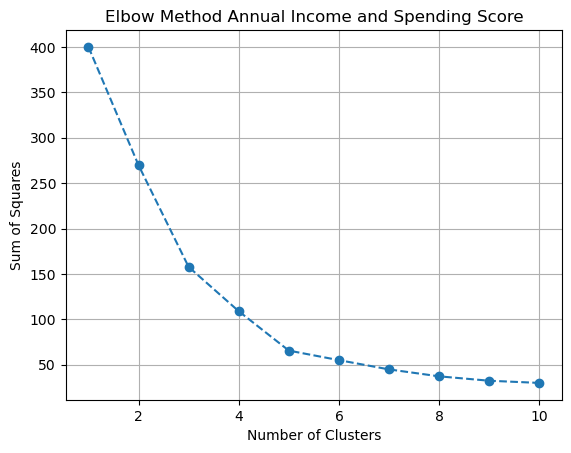

In [80]:
from sklearn.cluster import KMeans

X1 = data[['Annual Income (k$)','Spending Score (1-100)']]

inertia = []

for k in range(1,11):
    kmeans = KMeans(n_clusters = k, init = "k-means++", random_state=42)
    kmeans.fit(X1)
    inertia.append(kmeans.inertia_)

plt.grid()
plt.plot(range(1,11), inertia, linestyle="--", marker="o")
plt.title("Elbow Method Annual Income and Spending Score")
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Squares")
plt.show()

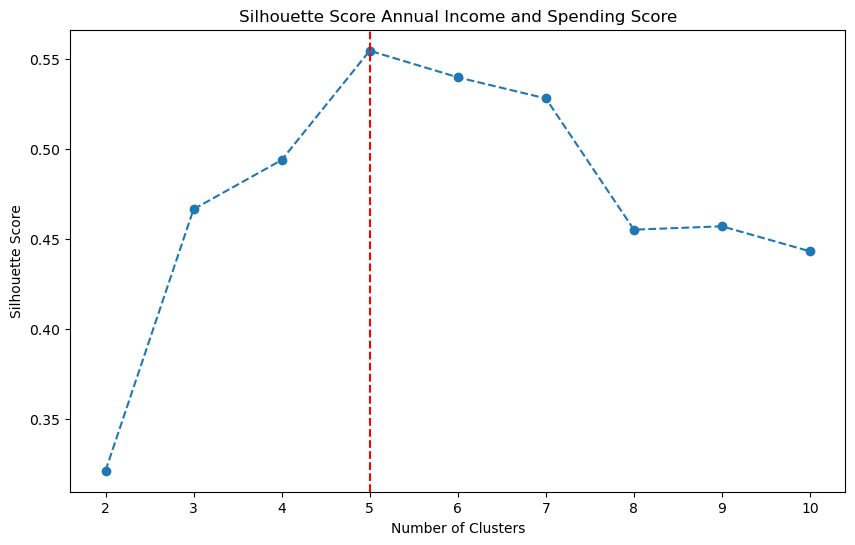

In [81]:
from sklearn.metrics import silhouette_score
warnings.filterwarnings('ignore')
# Menghitung silhouette score
silhouette_scores = []

for k in range(2,11):
  kmeans_ss = KMeans(n_clusters=k, random_state=42)
  kmeans_ss.fit(X1)
  score = silhouette_score(X1, kmeans_ss.labels_)
  silhouette_scores.append(score)
    

plt.figure(figsize=(10,6))
plt.plot(range(2,11), silhouette_scores, marker="o", linestyle="--")
plt.title("Silhouette Score Annual Income and Spending Score")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.axvline(x=5, color='red', linestyle='--', label='Vertical Line at x=3')
plt.show()

Text(0, 0.5, 'Annual Income')

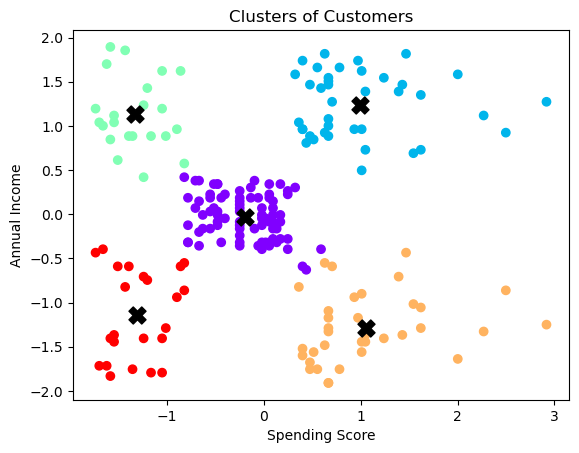

In [82]:
kmeans = KMeans(n_clusters=5, init="k-means++", random_state=42)
labels= kmeans.fit_predict(X1)
centroids = kmeans.cluster_centers_

plt.scatter(X1["Annual Income (k$)"], X1["Spending Score (1-100)"],c=labels, cmap="rainbow")
plt.scatter(centroids[:,0], centroids[:,1], color="black", s=150, marker="X")
plt.title("Clusters of Customers")
plt.xlabel("Spending Score")
plt.ylabel("Annual Income")

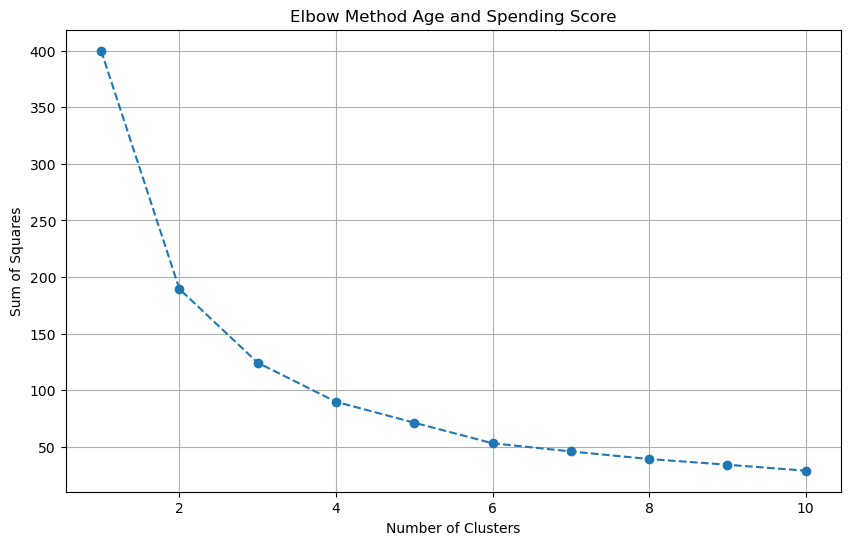

In [83]:
from sklearn.cluster import KMeans

X2 = data[['Age','Spending Score (1-100)']]

inertia2 = []

for k in range(1,11):
    kmeans2 = KMeans(n_clusters = k, init = "k-means++", random_state=42)
    kmeans2.fit(X2)
    inertia2.append(kmeans2.inertia_)

plt.figure(figsize=(10,6))
plt.grid()
plt.plot(range(1,11), inertia2, linestyle="--", marker="o")
plt.title("Elbow Method Age and Spending Score")
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Squares")
plt.show()

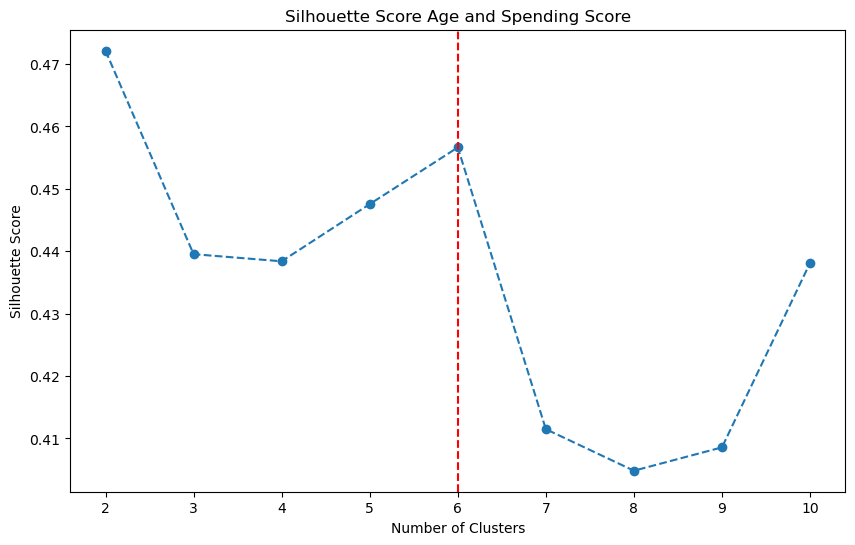

In [84]:
from sklearn.metrics import silhouette_score
warnings.filterwarnings('ignore')
# Menghitung silhouette score
silhouette_scores_2 = []

for k in range(2,11):
  kmeans_ss_2 = KMeans(n_clusters=k, random_state=42)
  kmeans_ss_2.fit(X2)
  score_2 = silhouette_score(X2, kmeans_ss_2.labels_)
  silhouette_scores_2.append(score_2)
    

plt.figure(figsize=(10,6))
plt.plot(range(2,11), silhouette_scores_2, marker="o", linestyle="--")
plt.title("Silhouette Score Age and Spending Score")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.axvline(x=6, color='red', linestyle='--', label='Vertical Line at x=3')
plt.show()

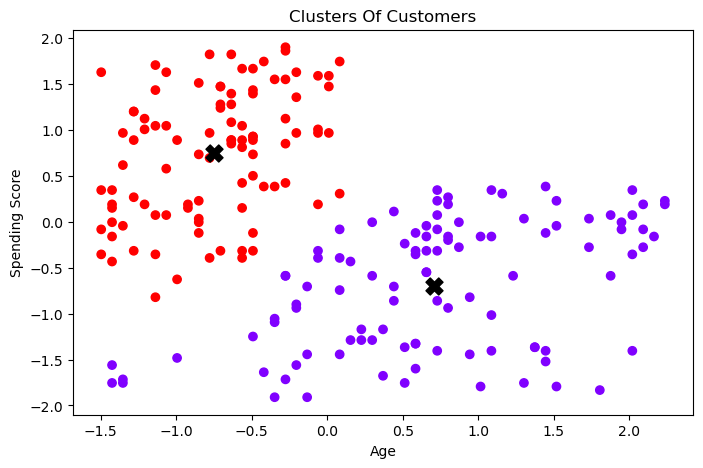

In [86]:
kmeans2 = KMeans(n_clusters=2, init="k-means++", random_state=42)
labels2= kmeans2.fit_predict(X2)
centroids2 = kmeans2.cluster_centers_

plt.figure(figsize=(8,5))
plt.scatter(X2["Age"], X2["Spending Score (1-100)"],c=labels2, cmap="rainbow")
plt.scatter(centroids2[:,0], centroids2[:,1], color="black", marker="X", s=150)
plt.title("Clusters Of Customers")
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.show()

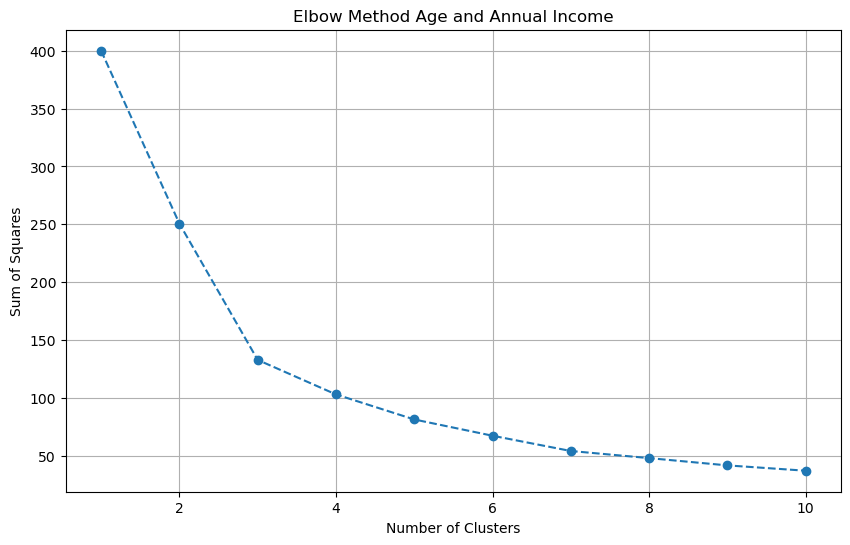

In [87]:
from sklearn.cluster import KMeans

X3 = data[['Age','Annual Income (k$)']]

inertia3 = []

for k in range(1,11):
    kmeans3 = KMeans(n_clusters = k, init = "k-means++", random_state=42)
    kmeans3.fit(X3)
    inertia3.append(kmeans3.inertia_)

plt.figure(figsize=(10,6))
plt.grid()
plt.plot(range(1,11), inertia3, linestyle="--", marker="o")
plt.title("Elbow Method Age and Annual Income")
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Squares")
plt.show()

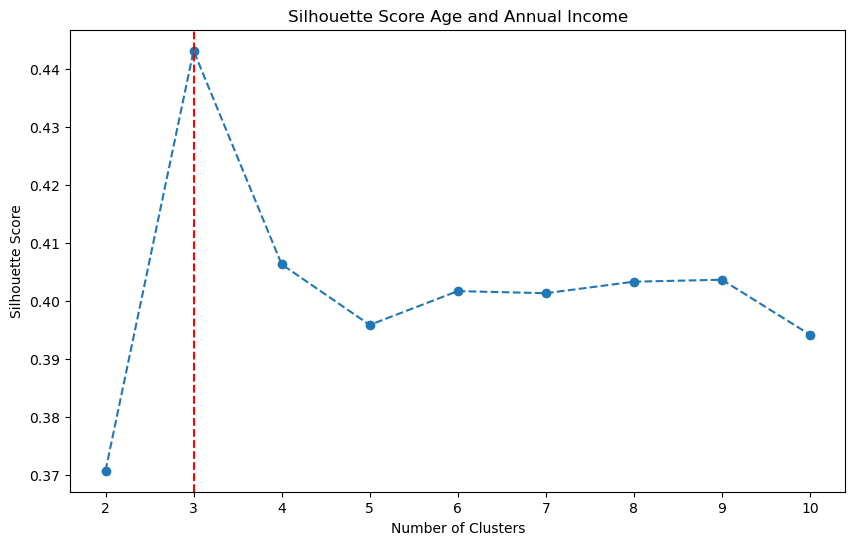

In [88]:
from sklearn.metrics import silhouette_score
warnings.filterwarnings('ignore')
# Menghitung silhouette score
silhouette_scores_3 = []

for k in range(2,11):
  kmeans_ss_3 = KMeans(n_clusters=k, random_state=42)
  kmeans_ss_3.fit(X3)
  score_3 = silhouette_score(X3, kmeans_ss_3.labels_)
  silhouette_scores_3.append(score_3)
    

plt.figure(figsize=(10,6))
plt.plot(range(2,11), silhouette_scores_3, marker="o", linestyle="--")
plt.title("Silhouette Score Age and Annual Income")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.axvline(x=3, color='red', linestyle='--', label='Vertical Line at x=3')
plt.show()

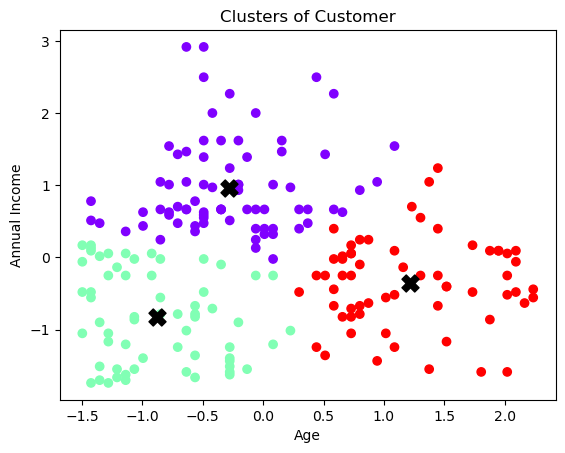

In [89]:
kmeans3 = KMeans(n_clusters=3, init="k-means++", random_state=42)
labels3= kmeans3.fit_predict(X3)
centroids3 = kmeans3.cluster_centers_

plt.scatter(X3["Age"], X3["Annual Income (k$)"],c=labels3, cmap="rainbow")
plt.scatter(centroids3[:,0], centroids3[:,1], color="black", marker="X", s=150)
plt.title("Clusters of Customer")
plt.xlabel("Age")
plt.ylabel("Annual Income")
plt.show()

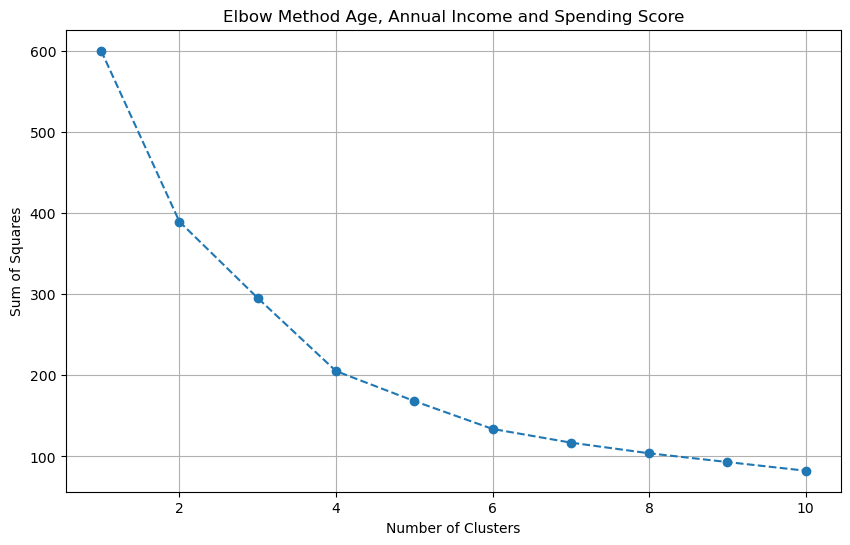

In [90]:
from sklearn.cluster import KMeans

X4 = data.iloc[:,1:]

inertia4 = []

for k in range(1,11):
    kmeans4 = KMeans(n_clusters = k, init = "k-means++", random_state=42)
    kmeans4.fit(X4)
    inertia4.append(kmeans4.inertia_)

plt.figure(figsize=(10,6))
plt.grid()
plt.plot(range(1,11), inertia4, linestyle="--", marker="o")
plt.title("Elbow Method Age, Annual Income and Spending Score")
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Squares")
plt.show()

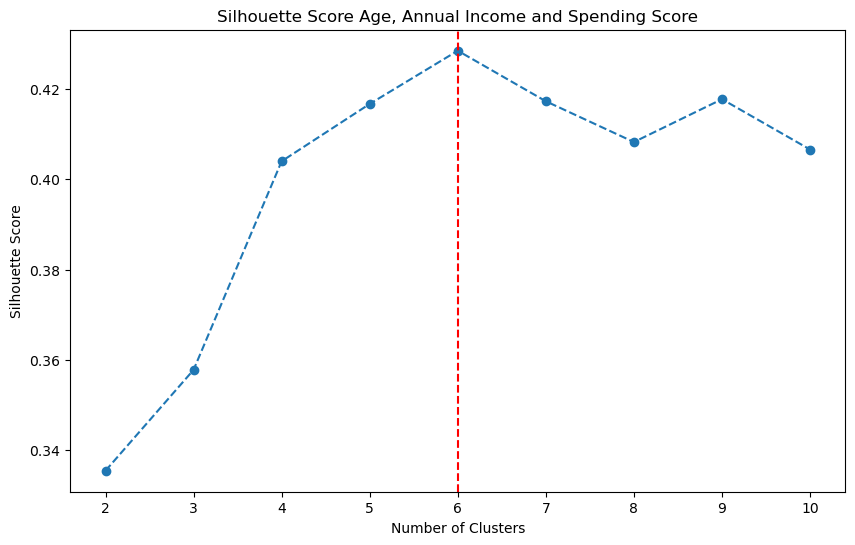

In [91]:
from sklearn.metrics import silhouette_score
warnings.filterwarnings('ignore')
# Menghitung silhouette score
silhouette_scores_4 = []

for k in range(2,11):
  kmeans_ss_4 = KMeans(n_clusters=k, random_state=42)
  kmeans_ss_4.fit(X4)
  score_4 = silhouette_score(X4, kmeans_ss_4.labels_)
  silhouette_scores_4.append(score_4)
    

plt.figure(figsize=(10,6))
plt.plot(range(2,11), silhouette_scores_4, marker="o", linestyle="--")
plt.title("Silhouette Score Age, Annual Income and Spending Score")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.axvline(x=6, color='red', linestyle='--', label='Vertical Line at x=3')
plt.show()

In [92]:
kmeans4 = KMeans(n_clusters=6, init="k-means++", random_state=42)
labels4= kmeans4.fit_predict(X4)
centroids4 = kmeans4.cluster_centers_

In [93]:
data["label"]=labels4
data

,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1.128152,-1.424569,-1.738999,-0.434801,4
1,1.128152,-1.281035,-1.738999,1.195704,4
2,-0.886405,-1.352802,-1.700830,-1.715913,5
3,-0.886405,-1.137502,-1.700830,1.040418,4
4,-0.886405,-0.563369,-1.662660,-0.395980,5
...,...,...,...,...,...
195,-0.886405,-0.276302,2.268791,1.118061,3
196,-0.886405,0.441365,2.497807,-0.861839,2
197,1.128152,-0.491602,2.497807,0.923953,3
198,1.128152,-0.491602,2.917671,-1.250054,2


In [94]:
from mpl_toolkits.mplot3d import Axes3D

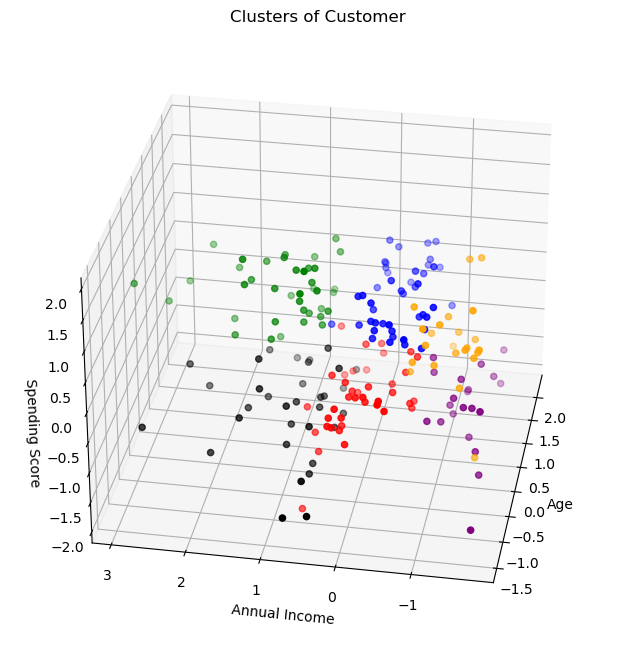

In [95]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data["Age"][data["label"] ==0], data["Annual Income (k$)"][data["label"] ==0], data["Spending Score (1-100)"][data["label"] ==0], c="blue")
ax.scatter(data["Age"][data["label"] ==1], data["Annual Income (k$)"][data["label"] ==1], data["Spending Score (1-100)"][data["label"] ==1], c="red")
ax.scatter(data["Age"][data["label"] ==2], data["Annual Income (k$)"][data["label"] ==2], data["Spending Score (1-100)"][data["label"] ==2], c="black")
ax.scatter(data["Age"][data["label"] ==3], data["Annual Income (k$)"][data["label"] ==3], data["Spending Score (1-100)"][data["label"] ==3], c="green")
ax.scatter(data["Age"][data["label"] ==4], data["Annual Income (k$)"][data["label"] ==4], data["Spending Score (1-100)"][data["label"] ==4], c="orange")
ax.scatter(data["Age"][data["label"] ==5], data["Annual Income (k$)"][data["label"] ==5], data["Spending Score (1-100)"][data["label"] ==5], c="purple")
ax.view_init(30,190)

plt.title("Clusters of Customer")
plt.xlabel("Age")
plt.ylabel("Annual Income")
ax.set_zlabel("Spending Score")
plt.show()

In [96]:
data_0 = data[data["label"]==0]
data_1 = data[data["label"]==1]
data_2 = data[data["label"]==2]
data_3 = data[data["label"]==3]
data_4 = data[data["label"]==4]
data_5 = data[data["label"]==5]

In [97]:
data_0

,Gender,Age,Annual Income (k$),Spending Score (1-100),label
40,-0.886405,1.876699,-0.861102,-0.590088,0
46,-0.886405,0.800199,-0.784763,0.186343,0
50,-0.886405,0.728432,-0.708425,0.069879,0
53,1.128152,1.446099,-0.670255,0.380451,0
54,-0.886405,0.800199,-0.670255,-0.201872,0
55,1.128152,0.584899,-0.670255,-0.357158,0
56,-0.886405,0.871965,-0.632086,-0.007764,0
57,1.128152,2.163766,-0.632086,-0.163051,0
59,1.128152,1.015499,-0.555747,-0.163051,0
60,1.128152,2.235532,-0.555747,0.225165,0


Copyright by ahmadalfianfaisal04@gmail.com